# **Download the Fashion MNIST Data**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Load the fashion mnist dataset both training and testing data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape: ", x_train.shape, " y_train shape: ", y_train.shape)


4431872/4422102 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)  y_train shape:  (60000,)


In [3]:
print("x_train shape: ", x_train.shape, " y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape, " y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)  y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)  y_test shape:  (10000,)


In [4]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # label 0
                        "Trouser",      # label 1
                        "Pullover",     # label 2 
                        "Dress",        # label 3 
                        "Coat",         # label 4
                        "Sandal",       # label 5
                        "Shirt",        # label 6 
                        "Sneaker",      # label 7 
                        "Bag",          # label 8 
                        "Ankle boot"]   # label 9


y = 2 Pullover


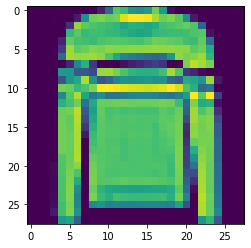

In [5]:
# Image index, you can pick any number between 0 and 59,999
i = 5
# y_train contains the lables, ranging from 0 to 9
label = y_train[i]
# Print the label, for example 2 Pullover
print ("y = " + str(label) + " " +(fashion_mnist_labels[label]))
# # Show one of the images from the training dataset
plt.imshow(x_train[i])

# **Data Normalization**
Normalize the pixel integer values which are between 0 and 255 so that they are between 0 and 1

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

# **Splitting Data Into Training, Validation, and Testing Data**
* Training Data: used for training the model
* Validation Data: used for tuning the hyper-parameters and to evaluate the model
* Test Data: used to test the model after it goes through training and initial vetting by the validation data

In [10]:
# Further break the training data such that 55 k examples are in training set and 
# remaining 5k are in validation set

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape the input data to add the channel dimension
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print the training set shape
print("x_train shape: ",x_train.shape, "y_train shape: ", y_train.shape)

# Print the number of training , validation, and test datasets
print(x_train.shape[0], 'training set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape:  (55000, 28, 28, 1) y_train shape:  (55000, 10)
55000 training set
5000 validation set
10000 test set


# **Step1: Define the CNN Model** 

In [11]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu", 
                                 input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

# **Step2: Compile the CNN Model**

In [12]:
# We have to specify the Optimizer, the Loss Function and Evaluation Metric to be used
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  

# **Step 3: Train the Model using Training set**

In [13]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
model.fit(x_train, y_train, batch_size=64, epochs=10, 
          validation_data=(x_valid,y_valid),
          callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.6079 - accuracy: 0.7758
Epoch 00001: val_loss improved from inf to 0.37433, saving model to model.weights.best.hdf5
860/860 [==============================] - 76s 87ms/step - loss: 0.6078 - accuracy: 0.7759 - val_loss: 0.3743 - val_accuracy: 0.8686
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4191 - accuracy: 0.8471
Epoch 00002: val_loss improved from 0.37433 to 0.32634, saving model to model.weights.best.hdf5
860/860 [==============================] - 73s 85ms/step - loss: 0.4192 - accuracy: 0.8471 - val_loss: 0.3263 - val_accuracy: 0.8840
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3731 - accuracy: 0.8633
Epoch 00003: val_loss improved from 0.32634 to 0.29865, saving model to model.weights.best.hdf5
860/860 [==============================] - 74s 86ms/step - loss: 0.3731 - accuracy: 0.8633 - val_loss: 0.2987 - val_accuracy: 0.8932
Epoch 4/10
859/860 [=========

# **Step 3.1 : - Load the Model with Best Validation Accuracy**

In [14]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

# **Step 4 - Testing the Model on Test Dataset and Getting Test Accuracy**

In [19]:
# Evaluate the model on test dataset
score = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print('\n', 'Test Accuracy: ', score[1])


 Test Accuracy:  0.9110000133514404


# **Step 5 - Use the Model to Predict on New Example and Visualize the Prediction**
* First we get the predictions with the model from the test data. 

* Then we print out 10 images from the test data set, and set the titles with the prediction (and the groud truth label). 

* If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

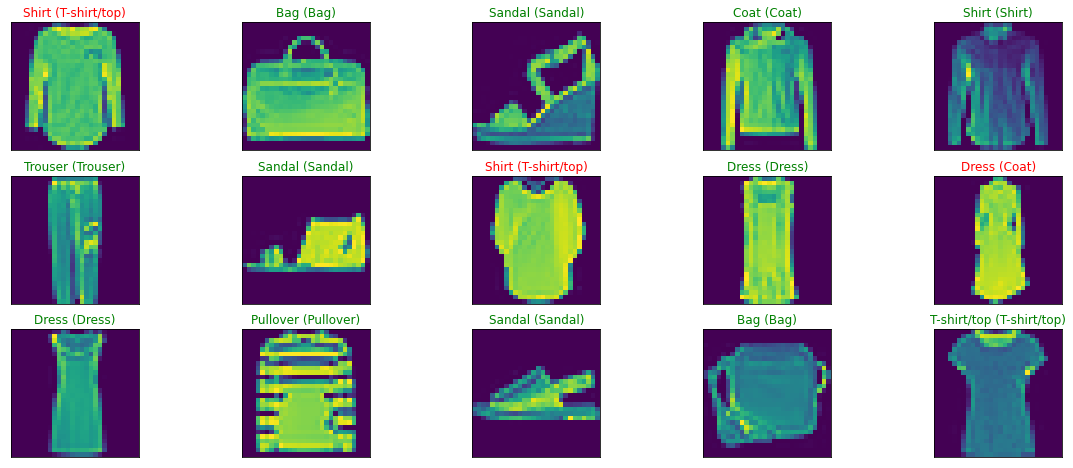

In [20]:
y_predict = model.predict(x_test)

# Plot a random sample of 15 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_predict[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))


# **Congragulations!**
You have successfully trained a CNN to classify fashion-MNIST with near 90% accuracy.